# PySDDR test run

In [1]:
# import the sddr module
from sddr import SDDR
import torch.nn as nn
import pandas as pd
import torch.optim as optim


Bad key "text.kerning_factor" on line 4 in
/home/haicu/dominik.thalmeier/anaconda3/envs/TorchKernel/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# First use case: A Simple GAM Poisson Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [2]:
data_path = './example_data/simple_gam/X.csv'
target_path = './example_data/simple_gam/Y.csv'

data = pd.read_csv(data_path,delimiter=';')
target = pd.read_csv(target_path)

output_dir = './outputs'

distribution  = 'Poisson'

formulas = {'rate': '~1+spline(x1, bs="bs",df=9)+spline(x2, bs="bs",df=9)+d1(x1)+d2(x2)'}
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
    'batch_size': 1000,
    'epochs': 2500,
    'regularization_params': {'rate': 1},
    'optimizer' : optim.RMSprop
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [3]:
sddr = SDDR(data=data,
            target=target,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

Using device:  cpu


### The SDDR network is trained with the data defined above

In [4]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 167.779343
Train Epoch: 100 	 Loss: 19.084795
Train Epoch: 200 	 Loss: 11.063432
Train Epoch: 300 	 Loss: 10.655548
Train Epoch: 400 	 Loss: 10.617717
Train Epoch: 500 	 Loss: 10.599340
Train Epoch: 600 	 Loss: 10.603042
Train Epoch: 700 	 Loss: 10.584563
Train Epoch: 800 	 Loss: 10.584295
Train Epoch: 900 	 Loss: 10.580371
Train Epoch: 1000 	 Loss: 10.560542
Train Epoch: 1100 	 Loss: 10.564119
Train Epoch: 1200 	 Loss: 10.558391
Train Epoch: 1300 	 Loss: 10.549367
Train Epoch: 1400 	 Loss: 10.542109
Train Epoch: 1500 	 Loss: 10.532697
Train Epoch: 1600 	 Loss: 10.524141
Train Epoch: 1700 	 Loss: 10.512859
Train Epoch: 1800 	 Loss: 10.503092
Train Epoch: 1900 	 Loss: 10.492690
Train Epoch: 2000 	 Loss: 10.481808
Train Epoch: 2100 	 Loss: 10.471222
Train Epoch: 2200 	 Loss: 10.456810
Train Epoch: 2300 	 Loss: 10.444331
Train Epoch: 2400 	 Loss: 10.431100


### Visualize the partial effects

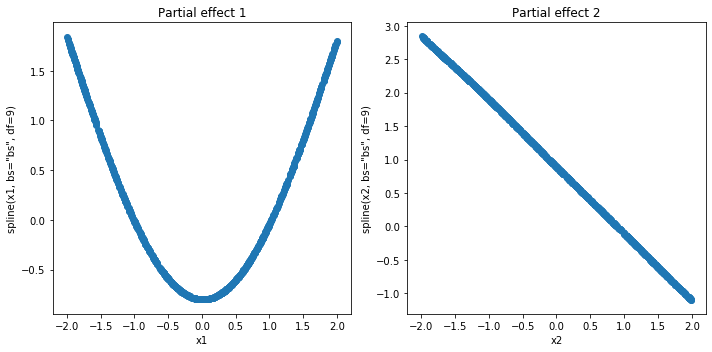

In [5]:
partial_effects = sddr.eval('rate')

# Second use case: GAMLSS - Normal Distribution

### The user defines the data, distribution and training parameters in the next cell

Alternatively these parameters can be defined in a config file (for example see config.yaml)

In [6]:
# second example
data_path = './example_data/gamlss/X.csv'
target_path = './example_data/gamlss/Y.csv'


output_dir = './outputs'

distribution  = 'Logistic'

formulas = {'loc': '~1+spline(x1, bs="bs", df=4)+spline(x2, bs="bs",df=4) + d1(x1)+d2(x2)',
            'scale': '~1 + spline(x3, bs="bs",df=4) + spline(x4, bs="bs",df=4)'
            }

deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(1,15)),
    'output_shape': 15},
'd2': {
    'model': nn.Sequential(nn.Linear(1,3),nn.ReLU(), nn.Linear(3,8)),
    'output_shape': 8}
}

train_parameters = {
    'batch_size': 1000,
    'epochs': 2500,
    'regularization_params': {'loc':0.00, 'scale':0.00},
    'optimizer' : optim.RMSprop
}

### The sddr instance is initialized with the parameters given by the user in the previous step

In [7]:
#instead of giving a data and target as data frames, here we give the path and the data is loaded automatically

sddr = SDDR(data=data_path,
            target=target_path,
            output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters)

Using device:  cpu


### The SDDR network is trained with the data defined above

In [8]:
sddr.train()

Beginning training ...
Train Epoch: 0 	 Loss: 3.529637
Train Epoch: 100 	 Loss: 2.449288
Train Epoch: 200 	 Loss: 2.402054
Train Epoch: 300 	 Loss: 2.359783
Train Epoch: 400 	 Loss: 2.326031
Train Epoch: 500 	 Loss: 2.304579
Train Epoch: 600 	 Loss: 2.294057
Train Epoch: 700 	 Loss: 2.290484
Train Epoch: 800 	 Loss: 2.289687
Train Epoch: 900 	 Loss: 2.290591
Train Epoch: 1000 	 Loss: 2.289627
Train Epoch: 1100 	 Loss: 2.289557
Train Epoch: 1200 	 Loss: 2.289630
Train Epoch: 1300 	 Loss: 2.289747
Train Epoch: 1400 	 Loss: 2.290761
Train Epoch: 1500 	 Loss: 2.290674
Train Epoch: 1600 	 Loss: 2.289588
Train Epoch: 1700 	 Loss: 2.289663
Train Epoch: 1800 	 Loss: 2.289778
Train Epoch: 1900 	 Loss: 2.289822
Train Epoch: 2000 	 Loss: 2.289672
Train Epoch: 2100 	 Loss: 2.289571
Train Epoch: 2200 	 Loss: 2.289511
Train Epoch: 2300 	 Loss: 2.289702
Train Epoch: 2400 	 Loss: 2.289580


### Visualize the partial effects

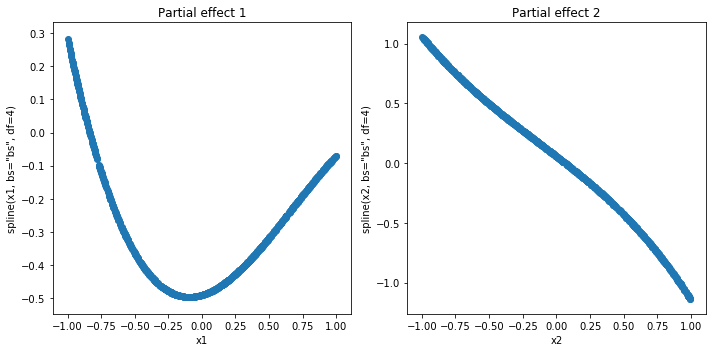

In [9]:
partial_effects = sddr.eval('loc')

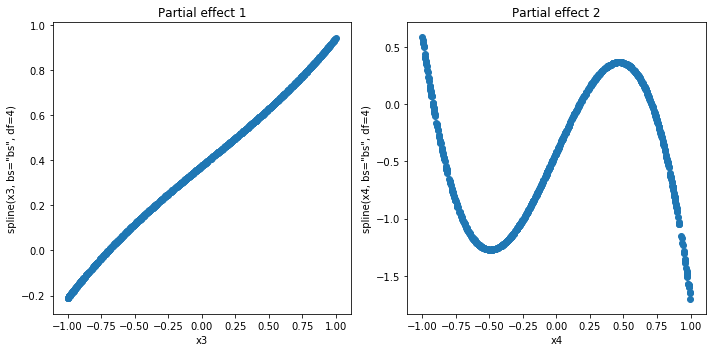

In [10]:
partial_effects = sddr.eval('scale')